# Visualize Vectrino time series data with and without filtering

Explores individual velocity time series from a Vectrino.

Needs:
- Vectrino ```*.dat``` ASCII time series data

User input:
- Data folder
- Frequency at which the data was collected, e.g. 25 Hz

## Loads

In [1]:
# standard loads
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

# import the despiking functions from UKDE_despike_v02.py
from UKDE_despike_v02 import * 

# %config InlineBackend.figure_format='retina' # hig-res plots for a Retina display, uncomment while working

## Find the data files and prep for loading the files 

In [2]:
##  --- User input ----------------------------- 

fs = 25 # frequency in Hz that the data was recorded at
dir_working = os.getcwd() # working directory, change to absolute path if running remote
dir_data = 'Data/' # relative path to the data with respect to the working

##   ------------------------------------------- 

ext = '*.dat'     # data file extension

fig_folder = 'Figures'
# Make the output folder
if os.path.isdir(fig_folder) != 1:
    os.mkdir(fig_folder)

# Specify the column header names in the *.dat files. These names can be found in the .hrd file.

cnames = ['time_s','status','v1_m_s', 'v2_m_s','v3_m_s','v4_m_s',
          'amp1', 'amp2','amp3','amp4','snr1', 'snr2','snr3','snr4',
          'cor1', 'cor2','cor3','cor4']

# Find all of the data files and store the names 

files = sorted(glob.glob(dir_data+ext))
nf=len(files)
os.chdir(dir_data)
filenames = sorted(glob.glob(ext))
for i in range(0,nf):
    filenames[i]=os.path.splitext(os.path.basename(filenames[i]))[0] #strips extension
os.chdir("..")
    
#Print the file names and index value for each file

for i in range(0,nf):
    print('file: ',filenames[i],'(index: ',i,')')

file:  VelRange01 (index:  0 )
file:  VelRange02 (index:  1 )
file:  VelRange03 (index:  2 )
file:  VelRange04 (index:  3 )
file:  profile01 (index:  4 )
file:  profile02 (index:  5 )
file:  profile03 (index:  6 )
file:  profile04 (index:  7 )
file:  profile05 (index:  8 )
file:  profile06 (index:  9 )
file:  profile07 (index:  10 )
file:  profile08 (index:  11 )
file:  profile09 (index:  12 )
file:  profile10 (index:  13 )
file:  profile11 (index:  14 )
file:  profile12 (index:  15 )


## Select the file to look at

In [3]:
# --- User input ----------------------------- 
j = 3 # select the file index to look at
#  ------------------------------------------- 

print('file: ',filenames[j],'(index: ',j,')')

file:  VelRange04 (index:  3 )


## Unfiltered data

In [4]:
# read data from a single file into a pandas dataframe

data = pd.read_csv(files[j], sep='\s+', header=None) # reads in the data
data.columns = cnames # renames the columns
data.iloc[:,0]=np.arange(len(data))/fs # changes the counter to time
data=data.drop(['status'], axis=1)  # delete the "status" column
print('number of rows =',len(data))
data.head(5) # display the first five lines of the dataframe

number of rows = 2979


,time_s,v1_m_s,v2_m_s,v3_m_s,v4_m_s,amp1,amp2,amp3,amp4,snr1,snr2,snr3,snr4,cor1,cor2,cor3,cor4
0,0.00,0.259,0.002,0.020,0.0,93,94,85,78,17.8,19.5,18.6,17.8,96,93,97,95
1,0.04,0.292,0.007,0.032,0.0,114,114,102,101,19.6,21.1,20.2,20.1,97,96,98,97
2,0.08,0.277,-0.002,0.005,0.0,120,130,123,111,20.0,22.3,21.8,20.9,97,97,98,97
3,0.12,0.280,-0.014,-0.006,0.0,104,130,114,105,18.8,22.3,21.1,20.4,97,96,98,98
4,0.16,0.265,0.000,0.017,0.0,122,136,123,105,20.1,22.7,21.8,20.4,98,98,98,98


## Plot the unfiltered data

mean u velocity [m/s] = 0.27
mean v velocity [m/s] = -0.0
mean w velocity [m/s] = 0.0


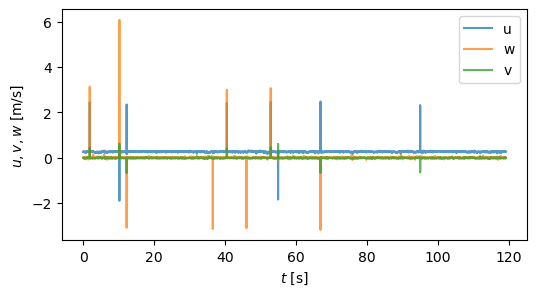

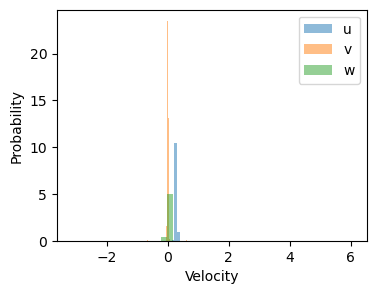

In [5]:
# calculate the means

uavg = data.v1_m_s.mean()
vavg = data.v2_m_s.mean()
wavg = data.v3_m_s.mean()

print('mean u velocity [m/s] =',np.around(uavg,decimals=2))
print('mean v velocity [m/s] =',np.around(vavg,decimals=2))
print('mean w velocity [m/s] =',np.around(wavg,decimals=2))

# plot the velocity time series

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(data.time_s,data.v1_m_s, alpha=0.75, label='u')
ax.plot(data.time_s,data.v3_m_s,alpha=0.75, label='w')
ax.plot(data.time_s,data.v2_m_s, alpha=0.75,label='v')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$u,v,w$ [m/s]')
plt.legend(loc='best', ncol=1)
plt.savefig(fig_folder+'/'+filenames[j]+'_timeseries_unfiltered.pdf',bbox_inches="tight", pad_inches=0.005)

fig, ax = plt.subplots(figsize=(4,3))
plt.hist(data.v1_m_s, 50, density=True, alpha=0.5, label='u')
plt.hist(data.v2_m_s, 50, density=True, alpha=0.5, label='v')
plt.hist(data.v3_m_s, 50, density=True, alpha=0.5, label='w')
plt.xlabel('Velocity')
plt.ylabel('Probability')
plt.legend();
plt.savefig(fig_folder+'/'+filenames[j]+'_pdf_unfiltered.pdf',bbox_inches="tight", pad_inches=0.005)

## Filtering or Despiking the data

velname =  u


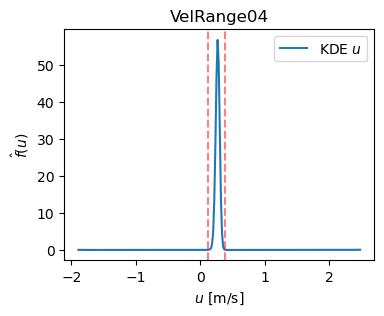

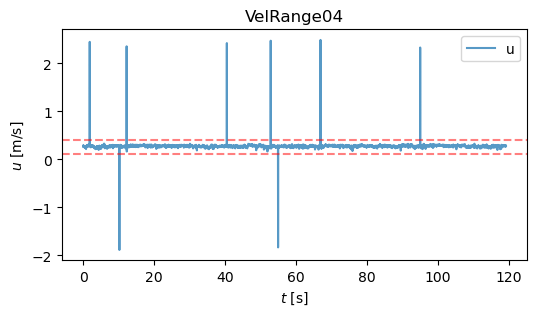

velname =  v


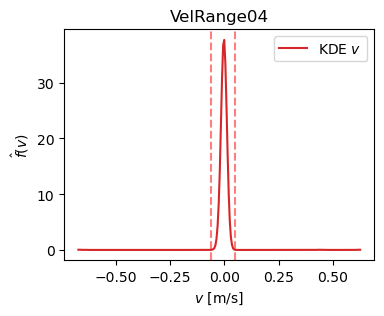

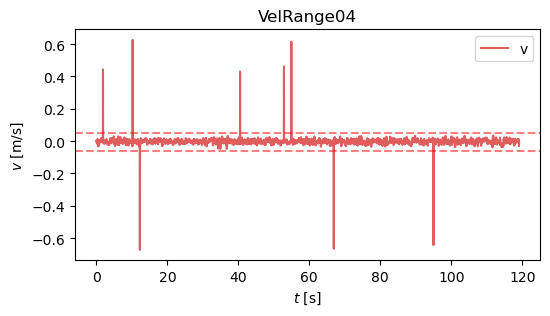

velname =  w


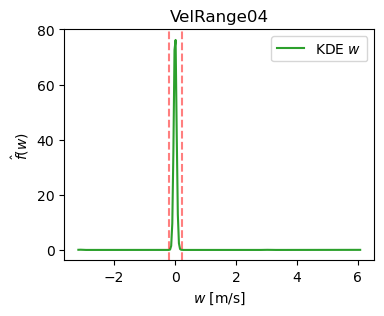

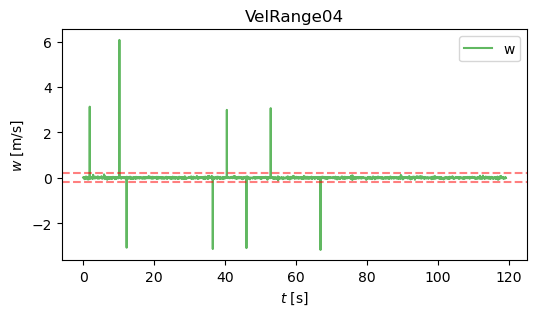

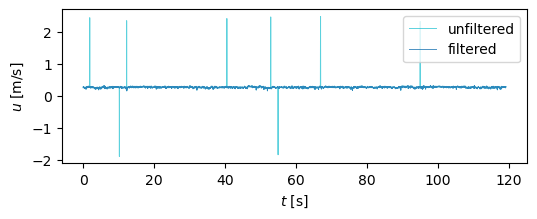

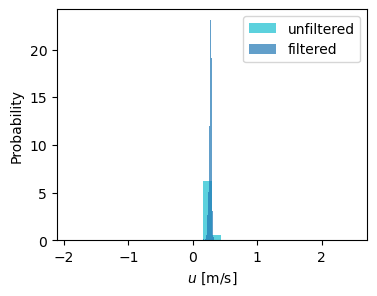

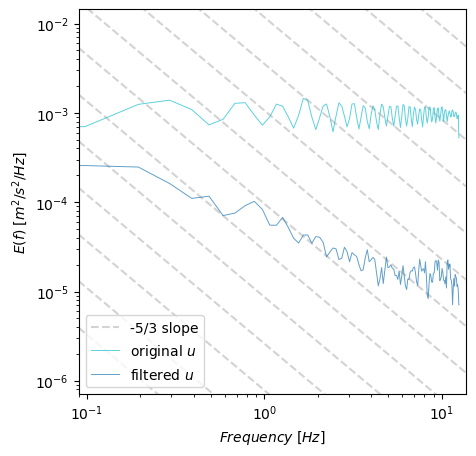

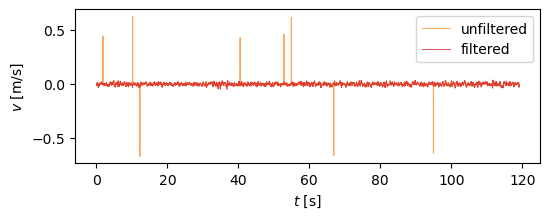

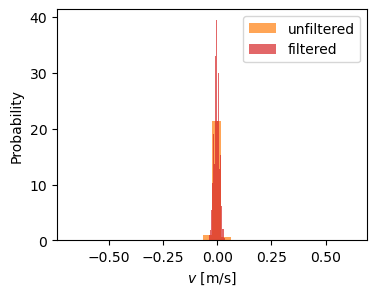

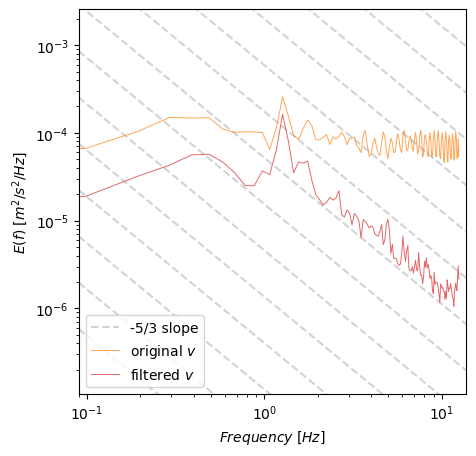

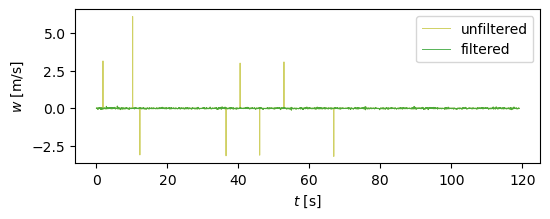

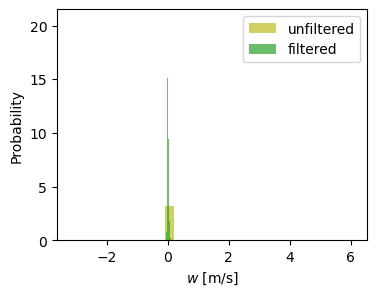

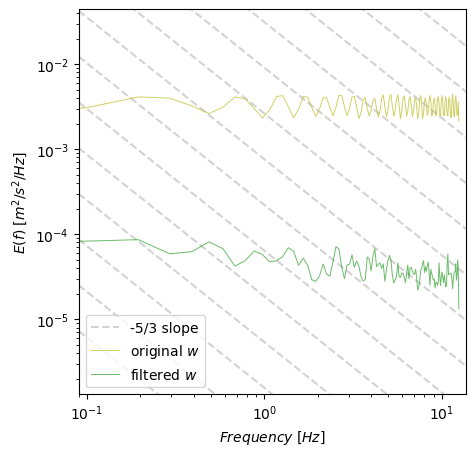

In [6]:
# Uses the UKDE despiking methods of Kraus 2024. 

##  --- User input ----------------------------- 

S_cut = 0.1 # gradient of the kernel where the cutoff is defined
R_cut = 0.1 # ratio of peak density to the density at S_cut

hu_METHOD = 'ROT_stdev' # options include:'IslamZhu','Chen_ures','ROT_stdev','ROT_Qn'
k_chen = 100 # coef if using the 'Chen_ures' hu_METHOD
ADV_FACE = 'side' # options are 'side' or 'down' for 4-beam Vectrino; 'singular and separate' when using despike_UKDE_1D

SHOW_PLOTS = 'yes' # to hide plots in notebook output use 'no'
SAVE_PLOTS = 'yes' # to not save the plots use 'no'
TITLE_PLOTS = 'yes' # to not title the plots use 'no'

plotpad = 0.05 # padding in output

time_cname = 'time_s'

##  ------------------------------------------- 

# define the output folders

velfilter_folder = dir_working+'/Data Filtered'

# Make the output folders

if os.path.isdir(velfilter_folder) !=1:
    os.mkdir(velfilter_folder)

# setup the naming for the plots

file = j
datapt = filenames[j] 
plottitle = filenames[j]

# produce a filtered or despiked dataframe, i.e. dataf (which is the same as data but filtered)

dataf, Id_li, vels = despike_UKDE_xyz(data, fs, R_cut, S_cut, hu_METHOD, ADV_FACE, time_cname,
                 plotpad, plottitle, fig_folder, datapt, file,
                 SHOW_PLOTS, SAVE_PLOTS, TITLE_PLOTS)

# save filtered ascii

dataf.to_csv(velfilter_folder+'/'+filenames[j]+'_filtered.csv',index=False)
